# **Larsen & Toubro Limited Stock Analysis and Forecasting**


## Objective

Predict the Larsen & Toubro Limited Stock Price for the next 30 days.

## Data Collection

- we are using the Yfinance library to gather the data, which can be used for analysis and forecasting
- We collected data from 1-Jan-2015 to 30-April-2024.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [45]:
data=yf.download('LT.NS', start='2015-1-1', end='2024-04-30')
df = pd.DataFrame(data)

[*********************100%%**********************]  1 of 1 completed


In [46]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,995.866638,1004.599976,994.666687,1001.966675,870.831177,674298
2015-01-02,1001.000000,1026.000000,1001.000000,1023.099976,889.198669,1936584
2015-01-05,1030.233276,1047.333374,1030.233276,1037.333374,901.569153,2176527
2015-01-06,1027.333374,1029.833374,997.366638,1002.733337,871.497620,3048025
2015-01-07,999.166687,1006.666687,990.366638,1000.333313,869.411621,2063635
2015-01-08,1013.000000,1015.666687,1002.766663,1006.700012,874.945129,1455954
2015-01-09,1014.666687,1016.000000,992.000000,1000.166687,869.266846,1735729
2015-01-12,1002.599976,1024.666626,996.733337,1022.799988,888.937988,1535320
2015-01-13,1029.966675,1031.433350,1010.799988,1013.000000,880.420532,1318348


 **About the data**

- Date: Date of trade

- Open: Opening Price

- High: Highest price on that day

- Low: Lowest price on that day

- Close: Close price

- Adj  Close: Adjusted close price adjusted for splits and dividend and/or capital gain distributions.

- Volume: Volume of stock trade on that day

In [8]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-15,3626.050049,3679.850098,3586.199951,3600.800049,3600.800049,1719910
2024-04-16,3580.050049,3598.149902,3529.449951,3543.449951,3543.449951,2291042
2024-04-18,3561.949951,3617.649902,3539.699951,3550.949951,3550.949951,3273257
2024-04-19,3525.000000,3542.899902,3472.399902,3518.350098,3518.350098,2759031
2024-04-22,3568.750000,3620.000000,3540.949951,3612.699951,3612.699951,2605754
2024-04-23,3632.750000,3632.750000,3588.000000,3610.149902,3610.149902,1434580
2024-04-24,3616.550049,3654.949951,3601.100098,3634.850098,3634.850098,1501234
2024-04-25,3616.100098,3666.000000,3611.600098,3652.300049,3652.300049,2420380
2024-04-26,3652.000000,3660.899902,3585.000000,3605.199951,3605.199951,1973113


# Exploratory Data Analysis

 Adj Close is not required of our analysis

In [47]:
# Removing "Adj Close" columnfrom dataset
df=df.drop(["Adj Close"],axis=1)
df

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-01,995.866638,1004.599976,994.666687,1001.966675,674298
2015-01-02,1001.000000,1026.000000,1001.000000,1023.099976,1936584
2015-01-05,1030.233276,1047.333374,1030.233276,1037.333374,2176527
2015-01-06,1027.333374,1029.833374,997.366638,1002.733337,3048025
2015-01-07,999.166687,1006.666687,990.366638,1000.333313,2063635
...,...,...,...,...,...
2024-04-23,3632.750000,3632.750000,3588.000000,3610.149902,1434580
2024-04-24,3616.550049,3654.949951,3601.100098,3634.850098,1501234
2024-04-25,3616.100098,3666.000000,3611.600098,3652.300049,2420380


In [48]:
df.duplicated().sum()

0

In [49]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

**Discriptive** **Statistics**

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2300 entries, 2015-01-01 to 2024-04-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2300 non-null   float64
 1   High    2300 non-null   float64
 2   Low     2300 non-null   float64
 3   Close   2300 non-null   float64
 4   Volume  2300 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 107.8 KB


In [14]:
df.describe()

,Open,High,Low,Close,Volume
count,2300.000000,2300.000000,2300.000000,2300.000000,2.300000e+03
mean,1498.813572,1514.678209,1482.141972,1497.805994,2.813645e+06
std,642.866436,648.702040,638.012651,643.737250,1.930362e+06
min,697.200012,735.000000,661.000000,702.433350,2.550860e+05
25%,1067.762482,1077.316650,1052.104126,1067.949982,1.686650e+06
50%,1324.900024,1338.250000,1310.549988,1323.375000,2.248459e+06
75%,1710.125000,1731.812500,1697.737488,1714.687500,3.303016e+06
max,3849.800049,3860.000000,3780.850098,3838.000000,2.115335e+07


In [51]:
df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999713,0.999733,0.999425,-0.226055
High,0.999713,1.000000,0.999691,0.999788,-0.216610
Low,0.999733,0.999691,1.000000,0.999748,-0.230714
Close,0.999425,0.999788,0.999748,1.000000,-0.221855
Volume,-0.226055,-0.216610,-0.230714,-0.221855,1.000000


apart from the voloume attribute all other attributes are highly corelated

**Visualizations**

In [17]:
sns.set_style(style='darkgrid')

Text(0.5, 1.0, 'Low')

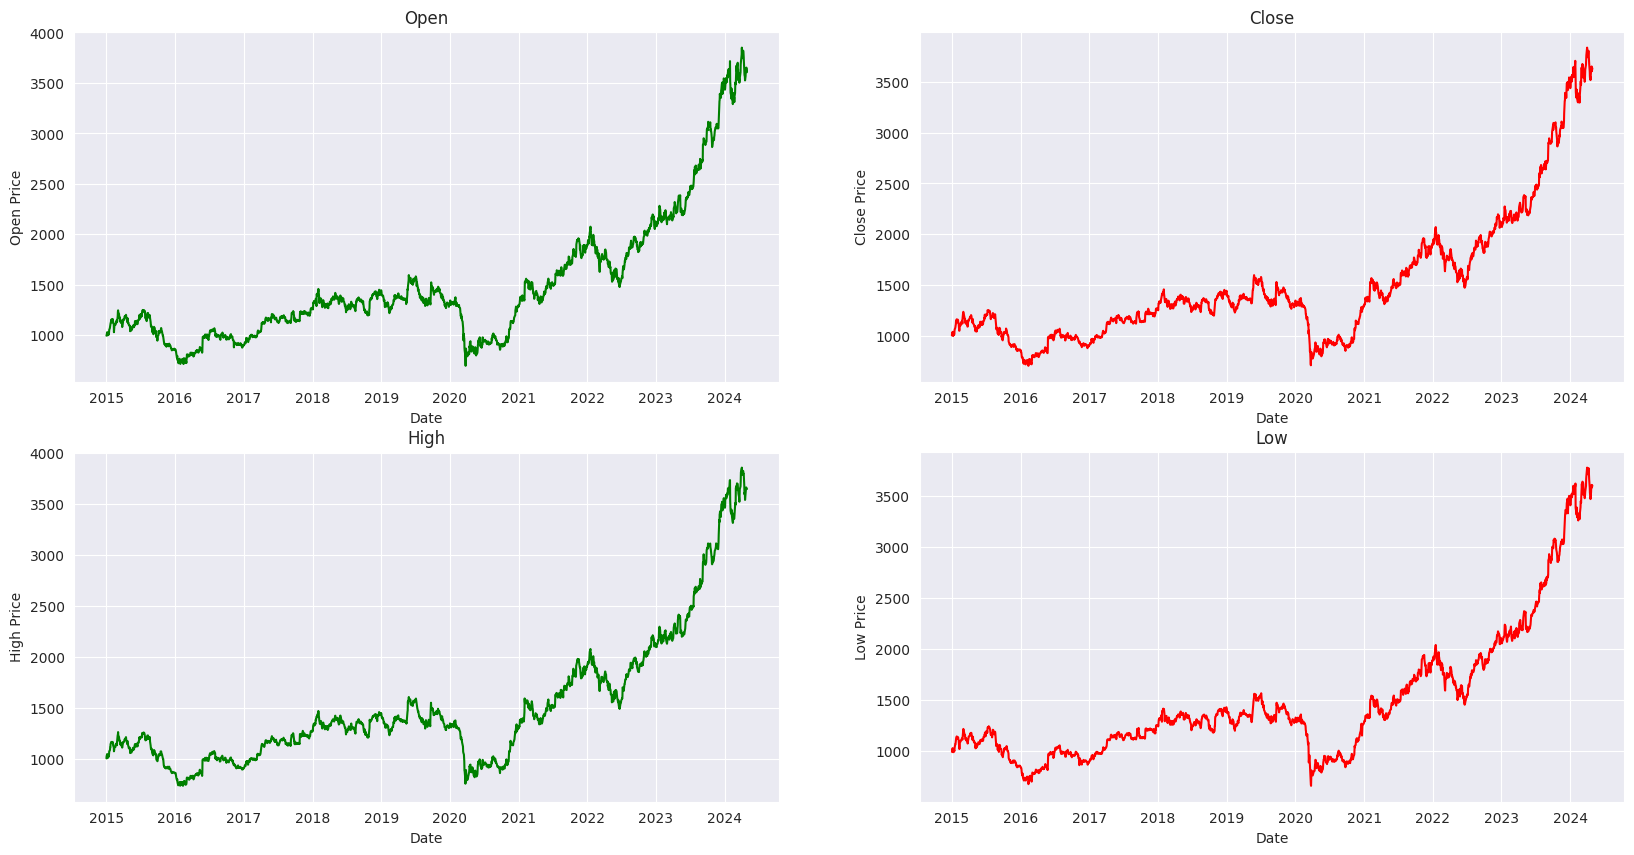

In [18]:
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.plot(df['Open'],color='green')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.plot(df['Close'],color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.plot(df['High'],color='green')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.plot(df['Low'],color='red')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

Text(0.5, 1.0, 'Low')

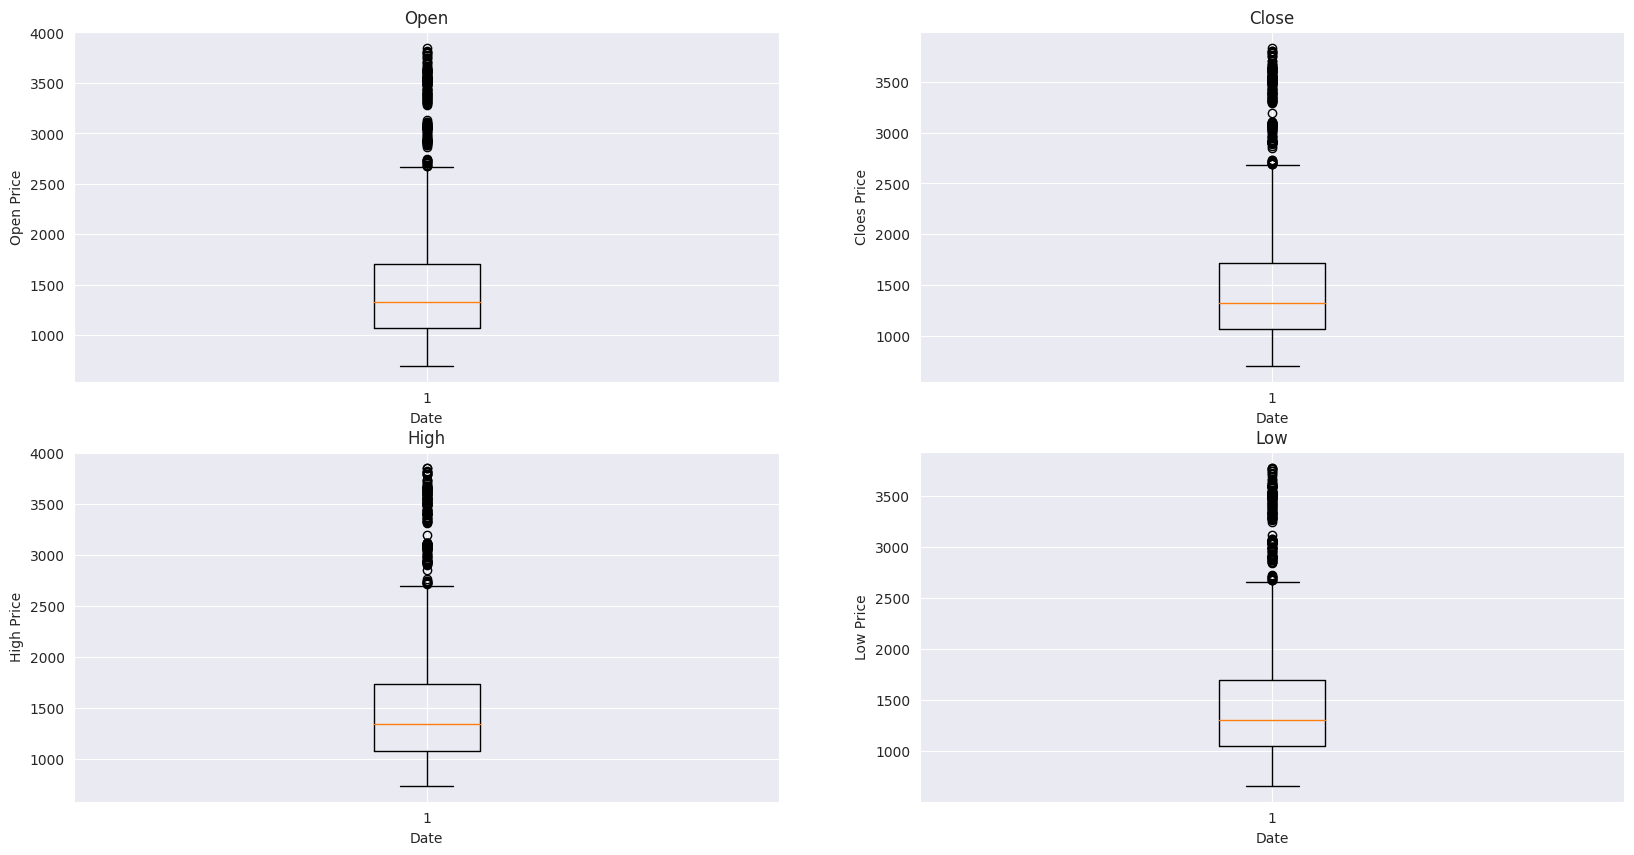

In [38]:
# Creating box-plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.boxplot(df['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.boxplot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Cloes Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.boxplot(df['High'])
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.boxplot(df['Low'])
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

From the box plot it is evident that there are certain outliers in the dataset. Outliers in stock time series data represent the days with the biggest profits and losses. Naively removing them can lead to bad models

Text(0.5, 1.0, 'Low')

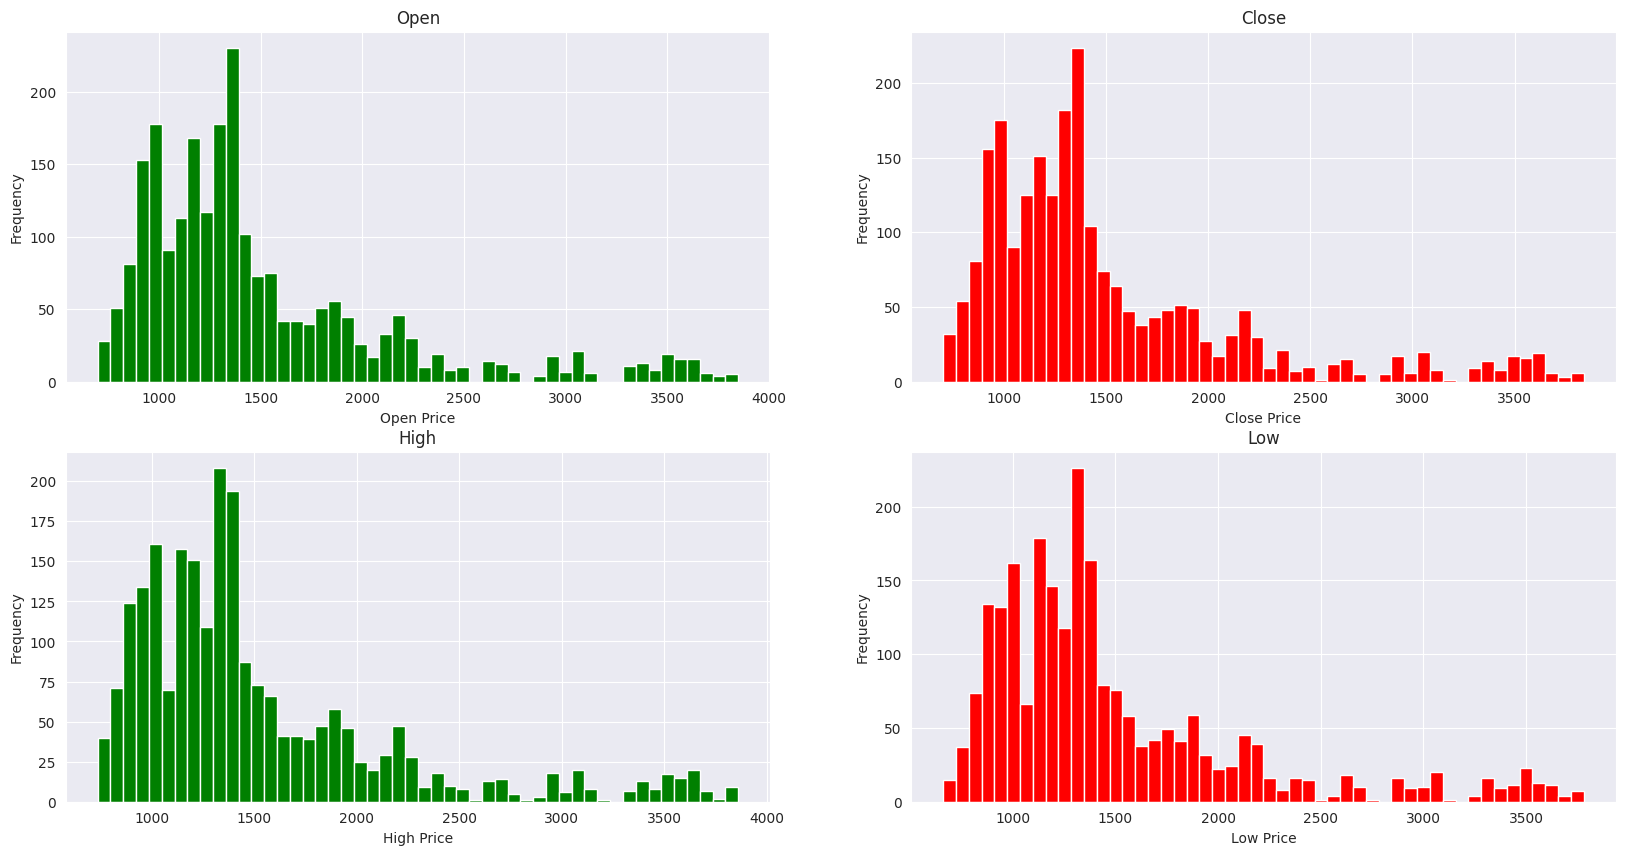

In [52]:
# Ploting Histogram
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.hist(df['Open'],bins=50, color='green')
plt.xlabel("Open Price")
plt.ylabel("Frequency")
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.hist(df['Close'],bins=50, color='red')
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.hist(df['High'],bins=50, color='green')
plt.xlabel("High Price")
plt.ylabel("Frequency")
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.hist(df['Low'],bins=50, color='red')
plt.xlabel("Low Price")
plt.ylabel("Frequency")
plt.title('Low')

Text(0.5, 1.0, 'Low')

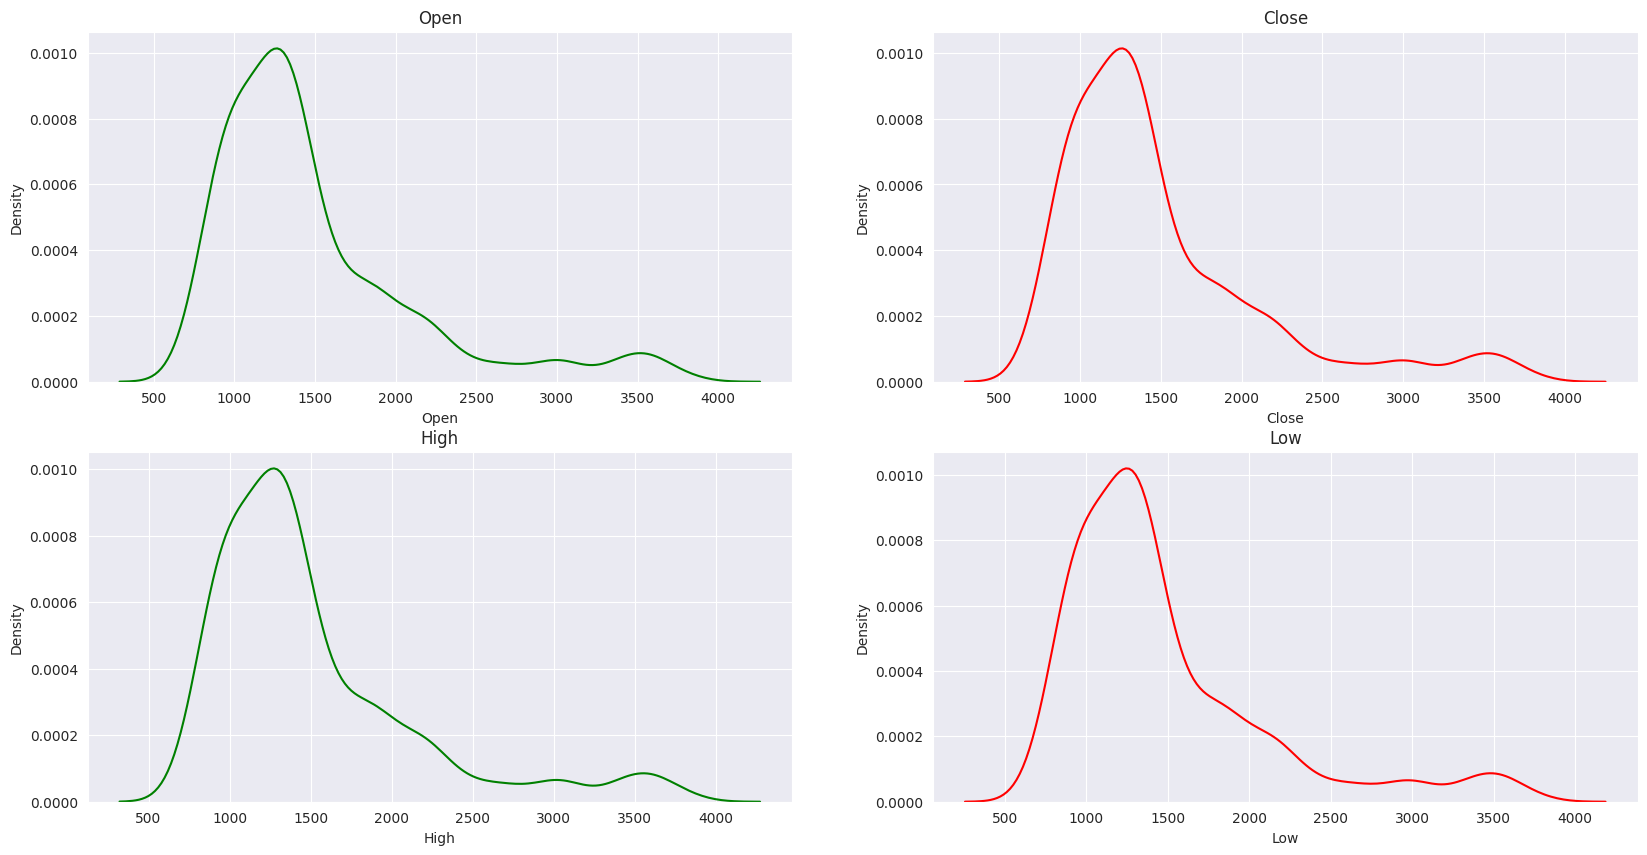

In [53]:
# KDE-Plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
sns.kdeplot(df['Open'], color='green')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
sns.kdeplot(df['Close'], color='red')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
sns.kdeplot(df['High'], color='green')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
sns.kdeplot(df['Low'], color='red')
plt.title('Low')

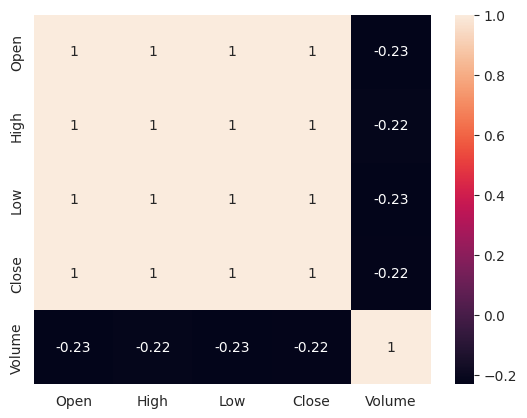

In [54]:
sns.heatmap(df.corr(),annot=True)
plt.show()

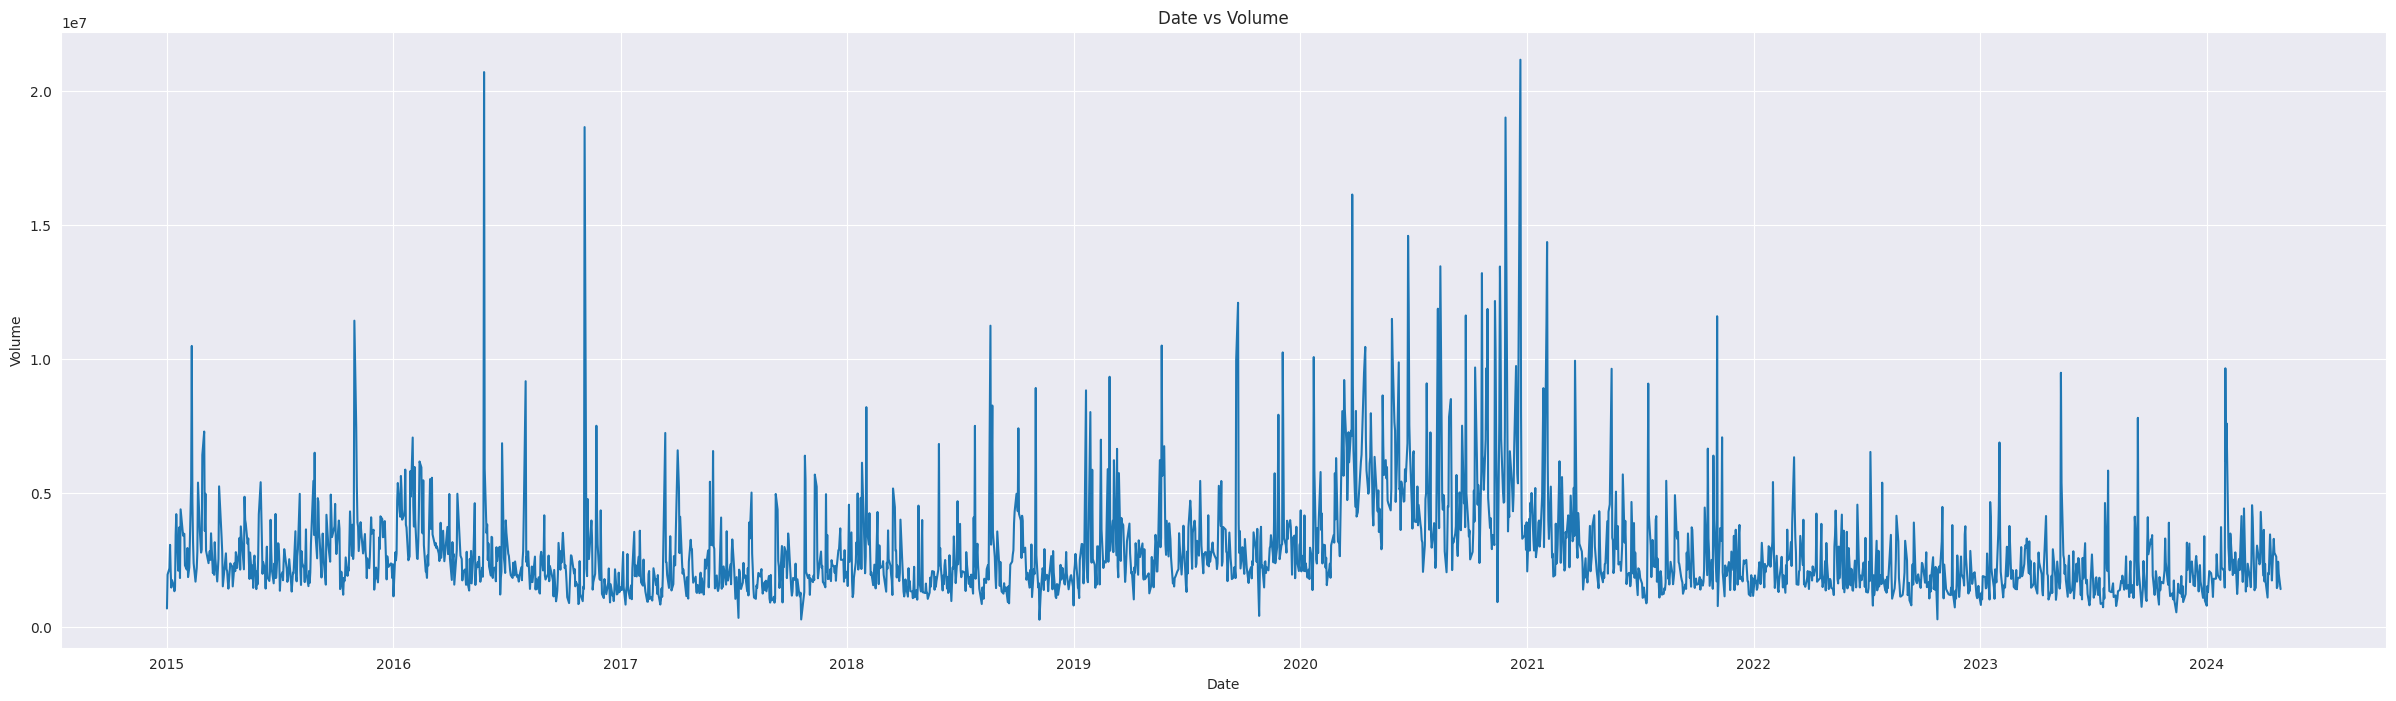

In [55]:
figure=plt.figure(figsize=(30,8))
plt.plot(df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Date vs Volume')
plt.show()

**Finding** **long-term and short-term trends**

Moving Average

In [56]:
df_ma=df.copy()
df_ma['30-day MA']=df['Close'].rolling(window=30).mean()
df_ma['100-day MA']=df['Close'].rolling(window=100).mean()

In [57]:
df_ma

,Open,High,Low,Close,Volume,30-day MA,100-day MA
Date,,,,,,,
2015-01-01,995.866638,1004.599976,994.666687,1001.966675,674298,NaN,NaN
2015-01-02,1001.000000,1026.000000,1001.000000,1023.099976,1936584,NaN,NaN
2015-01-05,1030.233276,1047.333374,1030.233276,1037.333374,2176527,NaN,NaN
2015-01-06,1027.333374,1029.833374,997.366638,1002.733337,3048025,NaN,NaN
2015-01-07,999.166687,1006.666687,990.366638,1000.333313,2063635,NaN,NaN
...,...,...,...,...,...,...,...
2024-04-23,3632.750000,3632.750000,3588.000000,3610.149902,1434580,3652.894987,3496.304497
2024-04-24,3616.550049,3654.949951,3601.100098,3634.850098,1501234,3652.649992,3502.196499
2024-04-25,3616.100098,3666.000000,3611.600098,3652.300049,2420380,3651.828328,3508.177000


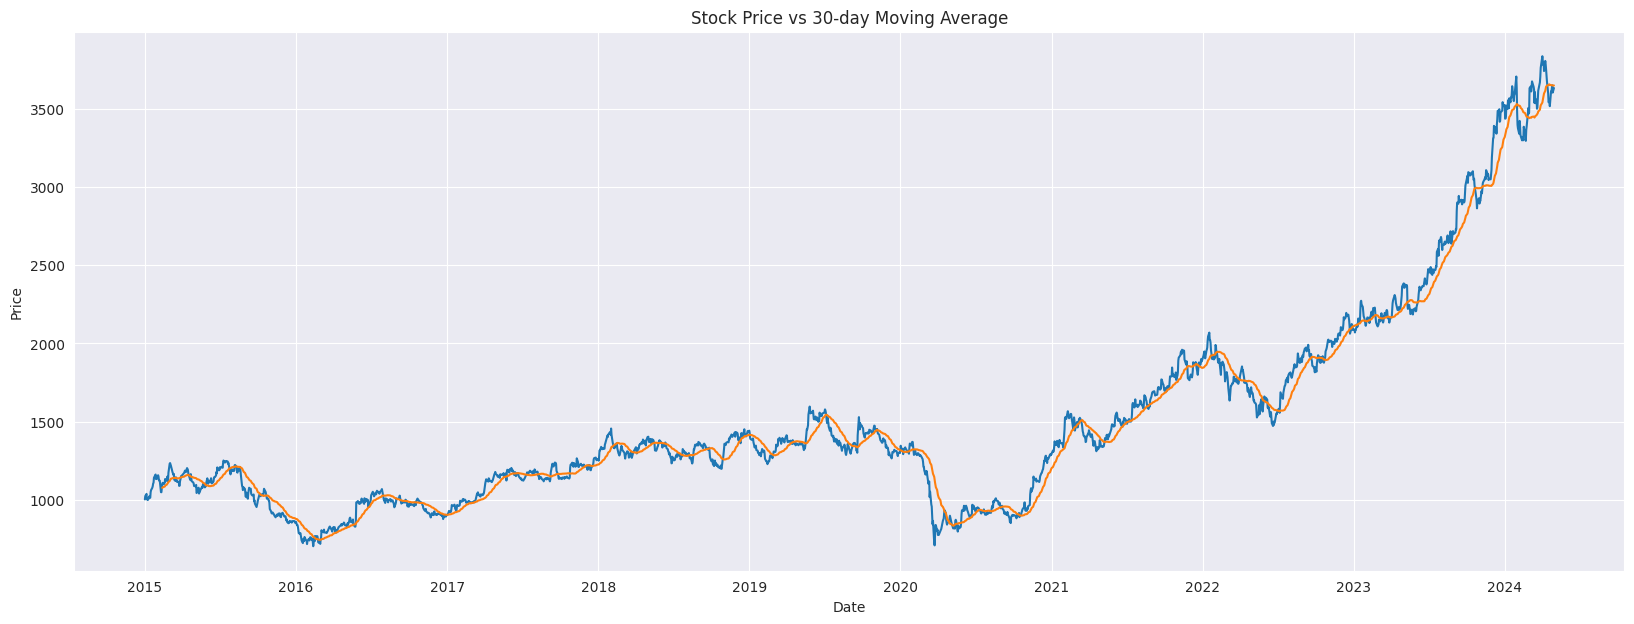

In [58]:
plt.figure(figsize=(20,7))
plt.plot(df_ma['Close'],label='Original data')
plt.plot(df_ma['30-day MA'],label='30-MA')
plt.legend
plt.title('Stock Price vs 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

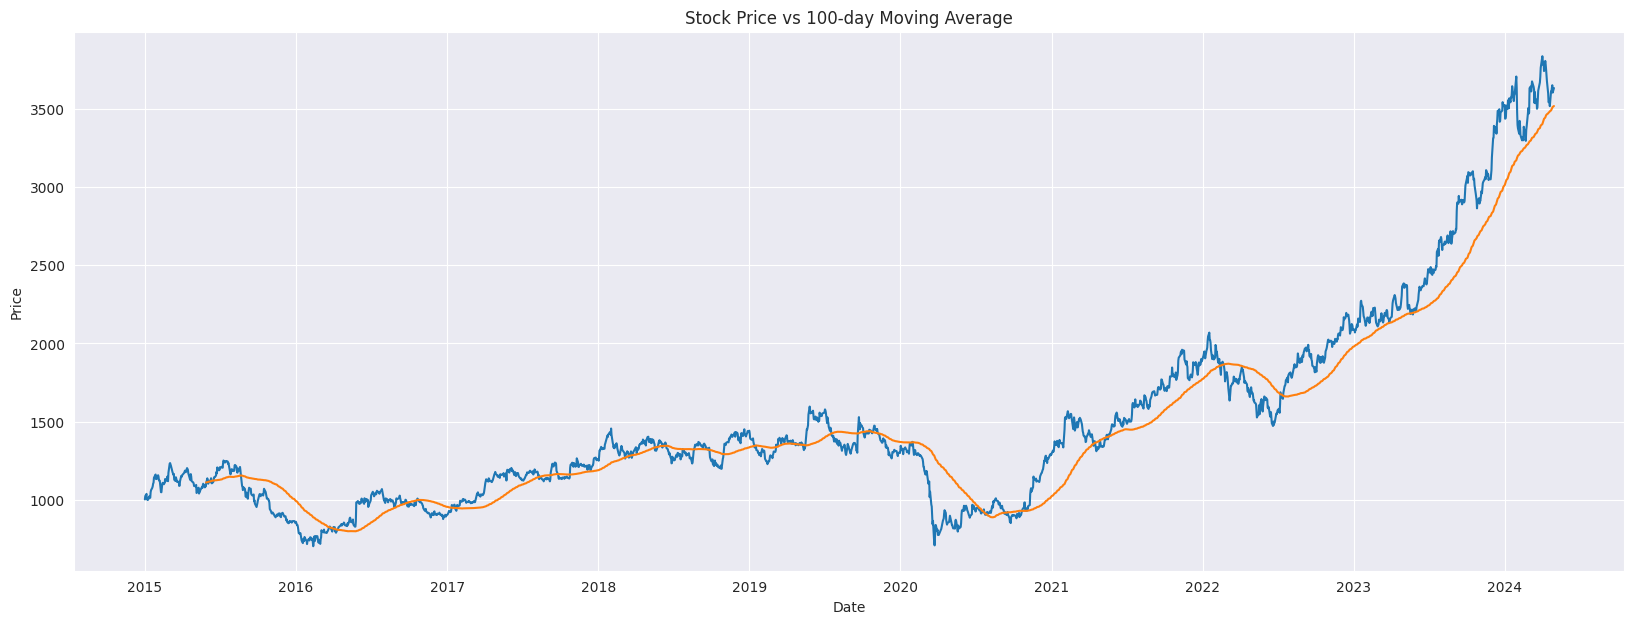

In [59]:
plt.figure(figsize=(20,7))
plt.plot(df_ma['Close'],label='Original data')
plt.plot(df_ma['100-day MA'],label='100-MA')
plt.legend
plt.title('Stock Price vs 100-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In long term, Stock price is in upward trend
Short term trends can be identified from MA-30 chart
Stock had a major short term downtrend during the year 2020 during the Covid-19 outbraek

**Model Building**

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px

In [61]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-01,995.866638,1004.599976,994.666687,1001.966675,674298
2015-01-02,1001.000000,1026.000000,1001.000000,1023.099976,1936584
2015-01-05,1030.233276,1047.333374,1030.233276,1037.333374,2176527
2015-01-06,1027.333374,1029.833374,997.366638,1002.733337,3048025
2015-01-07,999.166687,1006.666687,990.366638,1000.333313,2063635
...,...,...,...,...,...
2024-04-23,3632.750000,3632.750000,3588.000000,3610.149902,1434580
2024-04-24,3616.550049,3654.949951,3601.100098,3634.850098,1501234
2024-04-25,3616.100098,3666.000000,3611.600098,3652.300049,2420380


In [62]:
close_df=pd.DataFrame(df['Close'])
close_df

,Close
Date,
2015-01-01,1001.966675
2015-01-02,1023.099976
2015-01-05,1037.333374
2015-01-06,1002.733337
2015-01-07,1000.333313
...,...
2024-04-23,3610.149902
2024-04-24,3634.850098
2024-04-25,3652.300049


In [63]:
print(close_df.shape)

(2300, 1)


In [64]:
close_df=close_df.reset_index()

In [65]:
close_df['Date']

0      2015-01-01
1      2015-01-02
2      2015-01-05
3      2015-01-06
4      2015-01-07
          ...    
2295   2024-04-23
2296   2024-04-24
2297   2024-04-25
2298   2024-04-26
2299   2024-04-29
Name: Date, Length: 2300, dtype: datetime64[ns]

Normalizing / scaling close value between 0 to 1

In [66]:
close_stock = close_df.copy()
del close_df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(close_df).reshape(-1,1))
print(closedf.shape)

(2300, 1)


 Split data for training and testing


In [67]:
training_size=int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1840, 1)
test_data:  (460, 1)


Create new dataset according to requirement of time-series prediction

In [68]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [69]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 13
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1826, 13)
y_train:  (1826,)
X_test:  (446, 13)
y_test (446,)


## Algorithms

Support vector regression - SVR

In [70]:
import math
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.01)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.01)

In [72]:
train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1826, 1)
Test data prediction: (446, 1)


In [73]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

Evaluation metrices RMSE, MSE and MAE

In [74]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))


Train data RMSE:  83.74186782291774
Train data MSE:  7012.700426471025
Test data MAE:  64.57799030110905
-------------------------------------------------------------------------------------
Test data RMSE:  423.4900649512926
Test data MSE:  179343.83511245003
Test data MAE:  381.2240324889716


Explained variance regression score


In [75]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9252746980282601
Test data explained variance regression score: 0.9107971789528838


R2 score for regression


In [76]:
train_r2_svr=r2_score(original_ytrain, train_predict)
test_r2_svr=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_svr)
print("Test data R2 score:", test_r2_svr)

Train data R2 score: 0.9110908292266048
Test data R2 score: 0.5296383016098006


Comparision between original stock close price vs predicted close price

In [77]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'], 'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],plotdf['test_predicted_close']],labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2300, 1)
Test predicted data:  (2300, 1)


Predicting next 30 days

In [78]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = svr_rbf.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


plotting last 15 days and next predicted 30 days

In [79]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [80]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Plotting whole closing stock price with prediction

In [81]:
svrdf=closedf.tolist()
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(svrdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Random Forest Regressor - RF

In [82]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [84]:
train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1826, 1)
Test data prediction: (446, 1)


In [86]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [87]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  3982825.371124864
Train data MSE:  15862897936875.91
Test data MAE:  3884644.3863643035
-------------------------------------------------------------------------------------
Test data RMSE:  6200824.759960517
Test data MSE:  38450227703739.41
Test data MAE:  6195976.722156436


In [88]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: -9793179.043340303
Test data explained variance regression score: -157622.56350110544


In [89]:
train_r2_rf=r2_score(original_ytrain, train_predict)
test_r2_rf=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_rf)
print("Test data R2 score:", test_r2_rf)

Train data R2 score: -201114693.17785576
Test data R2 score: -100842686.98468037


Comparision between original stock close price vs predicted close price

In [90]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2300, 1)
Test predicted data:  (2300, 1)


### Predicting next 30 days

In [91]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = regressor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = regressor.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))


Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [92]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [93]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [94]:
rfdf=closedf.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### K-nearest neighgbour - KNN

In [95]:
from sklearn import neighbors

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [96]:
# Lets Do the prediction

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1826, 1)
Test data prediction: (446, 1)


In [97]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [98]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  26.712597432782548
Train data MSE:  713.5628616059007
Test data MAE:  18.72602913532133
-------------------------------------------------------------------------------------
Test data RMSE:  868.1571303976688
Test data MSE:  753696.8030603149
Test data MAE:  637.3054792306143


In [99]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9909598757840802
Test data explained variance regression score: 0.08170250745133012


In [100]:
train_r2_knn=r2_score(original_ytrain, train_predict)
test_r2_knn=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_knn)
print("Test data R2 score:", test_r2_knn)

Train data R2 score: 0.9909532307867317
Test data R2 score: -0.9767064094309825


### Comparision between original stock close price vs predicted close price

In [101]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2300, 1)
Test predicted data:  (2300, 1)


### Predicting next 30 days

In [102]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = neighbor.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [103]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [104]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


### Plotting whole closing stock price with prediction

In [105]:
knndf=closedf.tolist()
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(knndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


LSTM

In [106]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1826, 13, 1)
X_test:  (446, 13, 1)


### LSTM model structure

In [107]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [108]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 13, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 13, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21025 (82.13 KB)
Trainable params: 21025 (82.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
58/58 [==============================] - 9s 41ms/step - loss: 0.0057 - val_loss: 0.0025
Epoch 2/100
58/58 [==============================] - 1s 18ms/step - loss: 3.4414e-04 - val_loss: 0.0018
Epoch 3/100
58/58 [==============================] - 1s 18ms/step - loss: 3.2570e-04 - val_loss: 0.0023
Epoch 4/100
58/58 [==============================] - 1s 18ms/step - loss: 3.2064e-04 - val_loss: 0.0026
Epoch 5/100
58/58 [==============================] - 1s 18ms/step - loss: 3.3746e-04 - val_loss: 0.0021
Epoch 6/100
58/58 [==============================] - 1s 23ms/step - loss: 3.2284e-04 - val_loss: 0.0035
Epoch 7/100
58/58 [==============================] - 2s 28ms/step - loss: 3.1268e-04 - val_loss: 0.0024
Epoch 8/100
58/58 [==============================] - 1s 19ms/step - loss: 3.3952e-04 - val_loss: 0.0063
Epoch 9/100
58/58 [==============================] - 1s 18ms/step - loss: 3.0672e-04 - val_loss: 0.0051
Epoch 10/100
58/58 [==============================] - 1s 18ms/step -

In [110]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

14/14 [==============================] - 0s 9ms/step


((1826, 1), (446, 1))

In [111]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [112]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  22.301149895201604
Train data MSE:  497.34128664825045
Test data MAE:  16.41718281373006
-------------------------------------------------------------------------------------
Test data RMSE:  63.96516226634617
Test data MSE:  4091.541983759996
Test data MAE:  41.506007720536736


In [113]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9942196114914197
Test data explained variance regression score: 0.9898543592490212


In [114]:
train_r2_lstm=r2_score(original_ytrain, train_predict)
test_r2_lstm=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_lstm)
print("Test data R2 score:", test_r2_lstm)

Train data R2 score: 0.9936945543516507
Test data R2 score: 0.9892691899037986


### Comparision between original stock close price vs predicted close price

In [115]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2300, 1)
Test predicted data:  (2300, 1)


### Predicting next 30 days

In [116]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [117]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [118]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [119]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### GRU (Gated Recurrent Unit)

In [120]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1826, 13, 1)
X_test:  (446, 13, 1)


In [121]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [122]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 13, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 13, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 13, 32)            6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22401 (87.50 KB)
Trainable params: 22401 (87.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [123]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
58/58 [==============================] - 11s 64ms/step - loss: 0.0028 - val_loss: 0.0011
Epoch 2/100
58/58 [==============================] - 1s 24ms/step - loss: 2.0252e-04 - val_loss: 0.0013
Epoch 3/100
58/58 [==============================] - 1s 24ms/step - loss: 1.9488e-04 - val_loss: 8.9068e-04
Epoch 4/100
58/58 [==============================] - 1s 24ms/step - loss: 1.9205e-04 - val_loss: 9.9772e-04
Epoch 5/100
58/58 [==============================] - 1s 24ms/step - loss: 1.8035e-04 - val_loss: 6.7235e-04
Epoch 6/100
58/58 [==============================] - 1s 24ms/step - loss: 2.0230e-04 - val_loss: 9.2991e-04
Epoch 7/100
58/58 [==============================] - 1s 25ms/step - loss: 1.5250e-04 - val_loss: 5.5484e-04
Epoch 8/100
58/58 [==============================] - 2s 38ms/step - loss: 1.5038e-04 - val_loss: 4.4717e-04
Epoch 9/100
58/58 [==============================] - 3s 45ms/step - loss: 1.6372e-04 - val_loss: 4.0729e-04
Epoch 10/100
58/58 [===================

In [124]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

14/14 [==============================] - 0s 6ms/step


((1826, 1), (446, 1))

In [125]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [126]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  21.43030871827257
Train data MSE:  459.2581317604693
Test data MAE:  15.28460074985667
-------------------------------------------------------------------------------------
Test data RMSE:  102.31777249168019
Test data MSE:  10468.926567659228
Test data MAE:  73.23399264074769


In [127]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9941928468638596
Test data explained variance regression score: 0.9854347771424802


In [128]:
train_r2_gru=r2_score(original_ytrain, train_predict)
test_r2_gru=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_gru)
print("Test data R2 score:", test_r2_gru)

Train data R2 score: 0.9941773842909885
Test data R2 score: 0.972543343474288


### Comparision between original stock close price vs predicted close price

In [129]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)


names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2300, 1)
Test predicted data:  (2300, 1)


In [130]:
plotdf.head(100)

,Date,original_close,train_predicted_close,test_predicted_close
0,2015-01-01,1001.966675,NaN,NaN
1,2015-01-02,1023.099976,NaN,NaN
2,2015-01-05,1037.333374,NaN,NaN
3,2015-01-06,1002.733337,NaN,NaN
4,2015-01-07,1000.333313,NaN,NaN
...,...,...,...,...
95,2015-05-25,1086.833374,1101.905151,NaN
96,2015-05-26,1078.933350,1086.763062,NaN
97,2015-05-27,1090.266724,1080.862183,NaN
98,2015-05-28,1084.500000,1091.973145,NaN


### Predicting next 30 days

In [131]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [132]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [133]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [134]:
grudf=closedf.tolist()
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])
fig = px.line(grudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [135]:
finaldf = pd.DataFrame({
    'svr':svrdf,
    'rf':rfdf,
    'knn':knndf,
    'lstm':lstmdf,
    'gru':grudf,
})
finaldf

,svr,rf,knn,lstm,gru
0,1001.966675,1001.966675,1001.966675,1001.966675,1001.966675
1,1023.099976,1023.099976,1023.099976,1023.099976,1023.099976
2,1037.333374,1037.333374,1037.333374,1037.333374,1037.333374
3,1002.733337,1002.733337,1002.733337,1002.733337,1002.733337
4,1000.333313,1000.333313,1000.333313,1000.333313,1000.333313
...,...,...,...,...,...
2325,1826.639273,1937.654009,1805.603854,2841.620878,2045.934033
2326,1798.464476,1937.073008,1819.961548,2830.083703,2028.274574
2327,1772.185093,1937.125009,1842.792321,2819.032454,2011.335873
2328,1746.738130,1937.921508,1860.769250,2808.434985,1995.065693


### Conclusion Chart

In [136]:
names = cycle(['SVR', 'RF','KNN','LSTM','GRU'])

fig = px.line(finaldf[225:], x=finaldf.index[225:], y=[finaldf['svr'][225:],finaldf['rf'][225:], finaldf['knn'][225:],
                                          finaldf['lstm'][225:], finaldf['gru'][225:],],
             labels={'x': 'Timestamp','value':'Stock close price'})
fig.update_layout(title_text='Final stock analysis chart', font_size=15, font_color='black',legend_title_text='Algorithms')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [137]:
data={"Model": ["SVR", "Random Forest", "KNN", "LSTM", "GRU"],
    "Train R2 Score": [train_r2_svr, train_r2_rf,train_r2_knn, train_r2_lstm, train_r2_gru],
    "Test R2 Score": [test_r2_svr, test_r2_rf, test_r2_knn, test_r2_lstm, test_r2_gru]}
df=pd.DataFrame(data)
df

,Model,Train R2 Score,Test R2 Score
0,SVR,9.110908e-01,5.296383e-01
1,Random Forest,-2.011147e+08,-1.008427e+08
2,KNN,9.909532e-01,-9.767064e-01
3,LSTM,9.936946e-01,9.892692e-01
4,GRU,9.941774e-01,9.725433e-01


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Train R2 Score'].plot(kind='hist', bins=20, title='Train R2 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Test R2 Score'].plot(kind='hist', bins=20, title='Test R2 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Train R2 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Train R2 Score', y='Test R2 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Train R2 Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Train R2 Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Test R2 Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Test R2 Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Train R2 Score'].plot(kind='line', figsize=(8, 4), title='Train R2 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Test R2 Score'].plot(kind='line', figsize=(8, 4), title='Test R2 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Train R2 Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Test R2 Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

From this table we can conclude that our LSTM model have best R2 scores in Training and Testing, Followed by GRU and KNN So we are going to use LSTM model

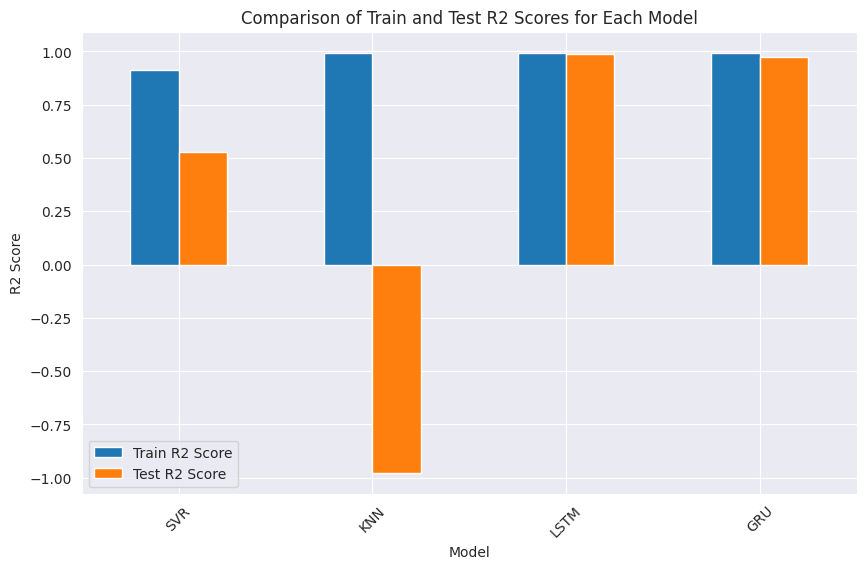

In [141]:
import matplotlib.pyplot as plt

# Data
data = {
    "Model": ["SVR",  "KNN", "LSTM", "GRU"],
    "Train R2 Score": [train_r2_svr, train_r2_knn, train_r2_lstm, train_r2_gru],
    "Test R2 Score": [test_r2_svr, test_r2_knn, test_r2_lstm, test_r2_gru]
}

# Create dataframe
df = pd.DataFrame(data)

# Set the model names as index
df.set_index('Model', inplace=True)

# Plotting
ax = df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Train and Test R2 Scores for Each Model')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()
